In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [15]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import mean_squared_error, mean_absolute_error
from tensorflow.keras import backend as K

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = gamma

    def build(self, input_shape):
        # Create a trainable weight variable for the centers of the RBFs
        self.centers = self.add_weight(name='centers',
                                      shape=(self.units, input_shape[-1]),
                                      initializer='uniform',
                                      trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        # Calculate the radial basis functions for each input sample and each RBF center
        diff = K.expand_dims(inputs) - self.centers  # shape: (batch_size, units, input_dim)
        norm = K.sum(K.square(diff), axis=-1)  # shape: (batch_size, units)
        rbf = K.exp(-self.gamma * norm)  # shape: (batch_size, units)

        return rbf

    def compute_output_shape(self, input_shape):
        return input_shape[0], self.units

In [21]:
# load data
df = pd.read_csv('CB.csv', delimiter=';')
# input and output
X = df.drop(columns=["GOAL","WINGSHOT","WINGACC"])
y = df.GOAL
# dataset splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# dataset normalization
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# create the model
model = Sequential()
model.add(Flatten(input_shape=(10,)))  # Adjust the input shape to (4,)
model.add(RBFLayer(10, 0.5))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))  # Use 'linear' activation for regression
model.compile(optimizer='rmsprop', loss=mean_squared_error)  # Use mean_squared_error for regression
# train model
model.fit(X_train, y_train, batch_size=8, epochs=100)
# data prediction
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

Epoch 1/100
129/129 [==============================] - 1s 2ms/step - loss: 7.1146
Epoch 2/100
129/129 [==============================] - 0s 2ms/step - loss: 3.3275
Epoch 3/100
129/129 [==============================] - 0s 2ms/step - loss: 2.7146
Epoch 4/100
129/129 [==============================] - 0s 1ms/step - loss: 2.2402
Epoch 5/100
129/129 [==============================] - 0s 2ms/step - loss: 1.9032
Epoch 6/100
129/129 [==============================] - 0s 2ms/step - loss: 1.6706
Epoch 7/100
129/129 [==============================] - 0s 1ms/step - loss: 1.5107
Epoch 8/100
129/129 [==============================] - 0s 1ms/step - loss: 1.3837
Epoch 9/100
129/129 [==============================] - 0s 1ms/step - loss: 1.2770
Epoch 10/100
129/129 [==============================] - 0s 2ms/step - loss: 1.1876
Epoch 11/100
129/129 [==============================] - 0s 2ms/step - loss: 1.0989
Epoch 12/100
129/129 [==============================] - 0s 3ms/step - loss: 1.0148
Epoch 13/100


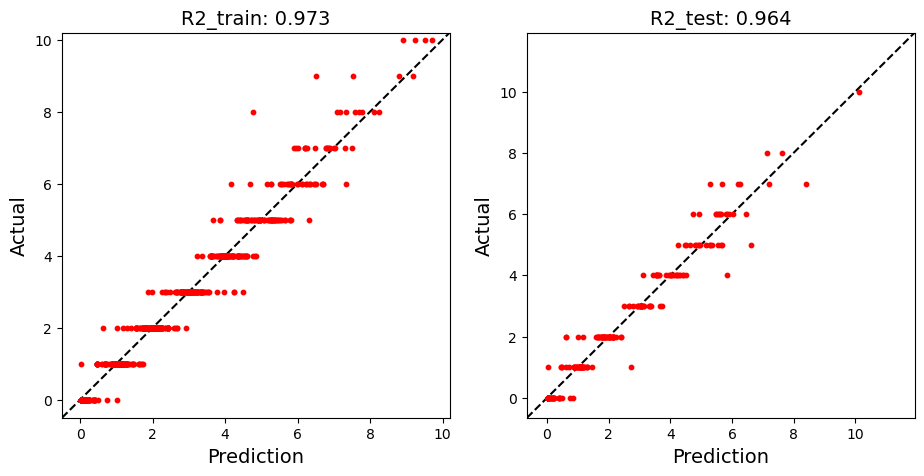

In [22]:
    # evaluation
    plt.figure(figsize=(11, 5))

    plt.subplot(121)
    plt.scatter(pred_train, y_train, c='r', s=10)
    x1, x2 = plt.xlim()
    y1, y2 = plt.ylim()
    lim = min(x1, y1), min(x2, y2)
    plt.xlim(*lim)
    plt.ylim(*lim)
    plt.plot(lim, lim, 'k--', zorder=-1)
    plt.xlabel("Prediction", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.title(f"R2_train: {r2_score(y_train, pred_train):.3f}", fontsize=14)
    

    plt.subplot(122)
    plt.scatter(pred_test, y_test, c='r', s=10)
    x1, x2 = plt.xlim()
    y1, y2 = plt.ylim()
    lim = min(x1, y1), min(x2, y2)
    plt.xlim(*lim)
    plt.ylim(*lim)
    plt.plot(lim, lim, 'k--', zorder=-1)
    plt.xlabel("Prediction", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.title(f"R2_test: {r2_score(y_test, pred_test):.3f}", fontsize=14)
    
    plt.show()


In [5]:
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
import matplotlib.pyplot as plt
mse_train = mean_squared_error(y_train, pred_train)
mae_train = median_absolute_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)
mae_test = median_absolute_error(y_test, pred_test)
print("MSE (Train):", mse_train)
print("MAE (Train):", mae_train)
print("MSE (Test):", mse_test)
print("MAE (Test):", mae_test)

MSE (Train): 0.7822059565494637
MAE (Train): 0.4131823778152466
MSE (Test): 1.1938926775729581
MAE (Test): 0.4854300022125244
